In [1]:
%matplotlib inline
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import geoplot
import mapclassify

In [2]:
plt.rcParams['figure.figsize'] = (95, 30)

In [3]:
df_municipalities = gpd.read_file('shape/municipalities_2018.geojson')

In [4]:
df_municipalities['coords'] = df_municipalities['geometry'].apply(lambda x: x.representative_point().coords[:])
df_municipalities['coords'] = [coords[0] for coords in df_municipalities['coords']]

In [5]:
df_municipalities.head()

,Kommunenum,Kommunenav,geometry,coords
0,2003,Vadsø,"MULTIPOLYGON (((1048559.000 7841160.000, 10485...","(1054011.9321760267, 7861141.75)"
1,5020,Osen,"MULTIPOLYGON (((271292.990 7136757.000, 271212...","(289457.8256584622, 7137596.0)"
2,1438,Bremanger,"MULTIPOLYGON (((-29156.720 6885495.170, -29225...","(-6423.51233544635, 6888777.095000001)"
3,1244,Austevoll,"MULTIPOLYGON (((-54073.640 6689016.160, -54130...","(-47874.72859984809, 6691445.15)"
4,1001,Kristiansand,"MULTIPOLYGON (((88111.860 6456544.010, 88145.8...","(86592.02205676393, 6470040.737160385)"


In [24]:
def visualize(data, values, title='', cat=False):
    ax = data.plot(
        column=values, 
        cmap='Reds', 
        legend=True, 
        vmin=0.0,
        vmax=float(np.max(values) if cat == False else len(set(values))),
        categorical=cat
    )

    # Draw municipality labels
    #for _, row in data.iterrows():
        #ax.annotate(s=row['Kommunenav'].upper(), xy=row['coords'], horizontalalignment='center', verticalalignment='center', color='green', alpha=0.95)
        
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False) 
    ax.set_title(title)

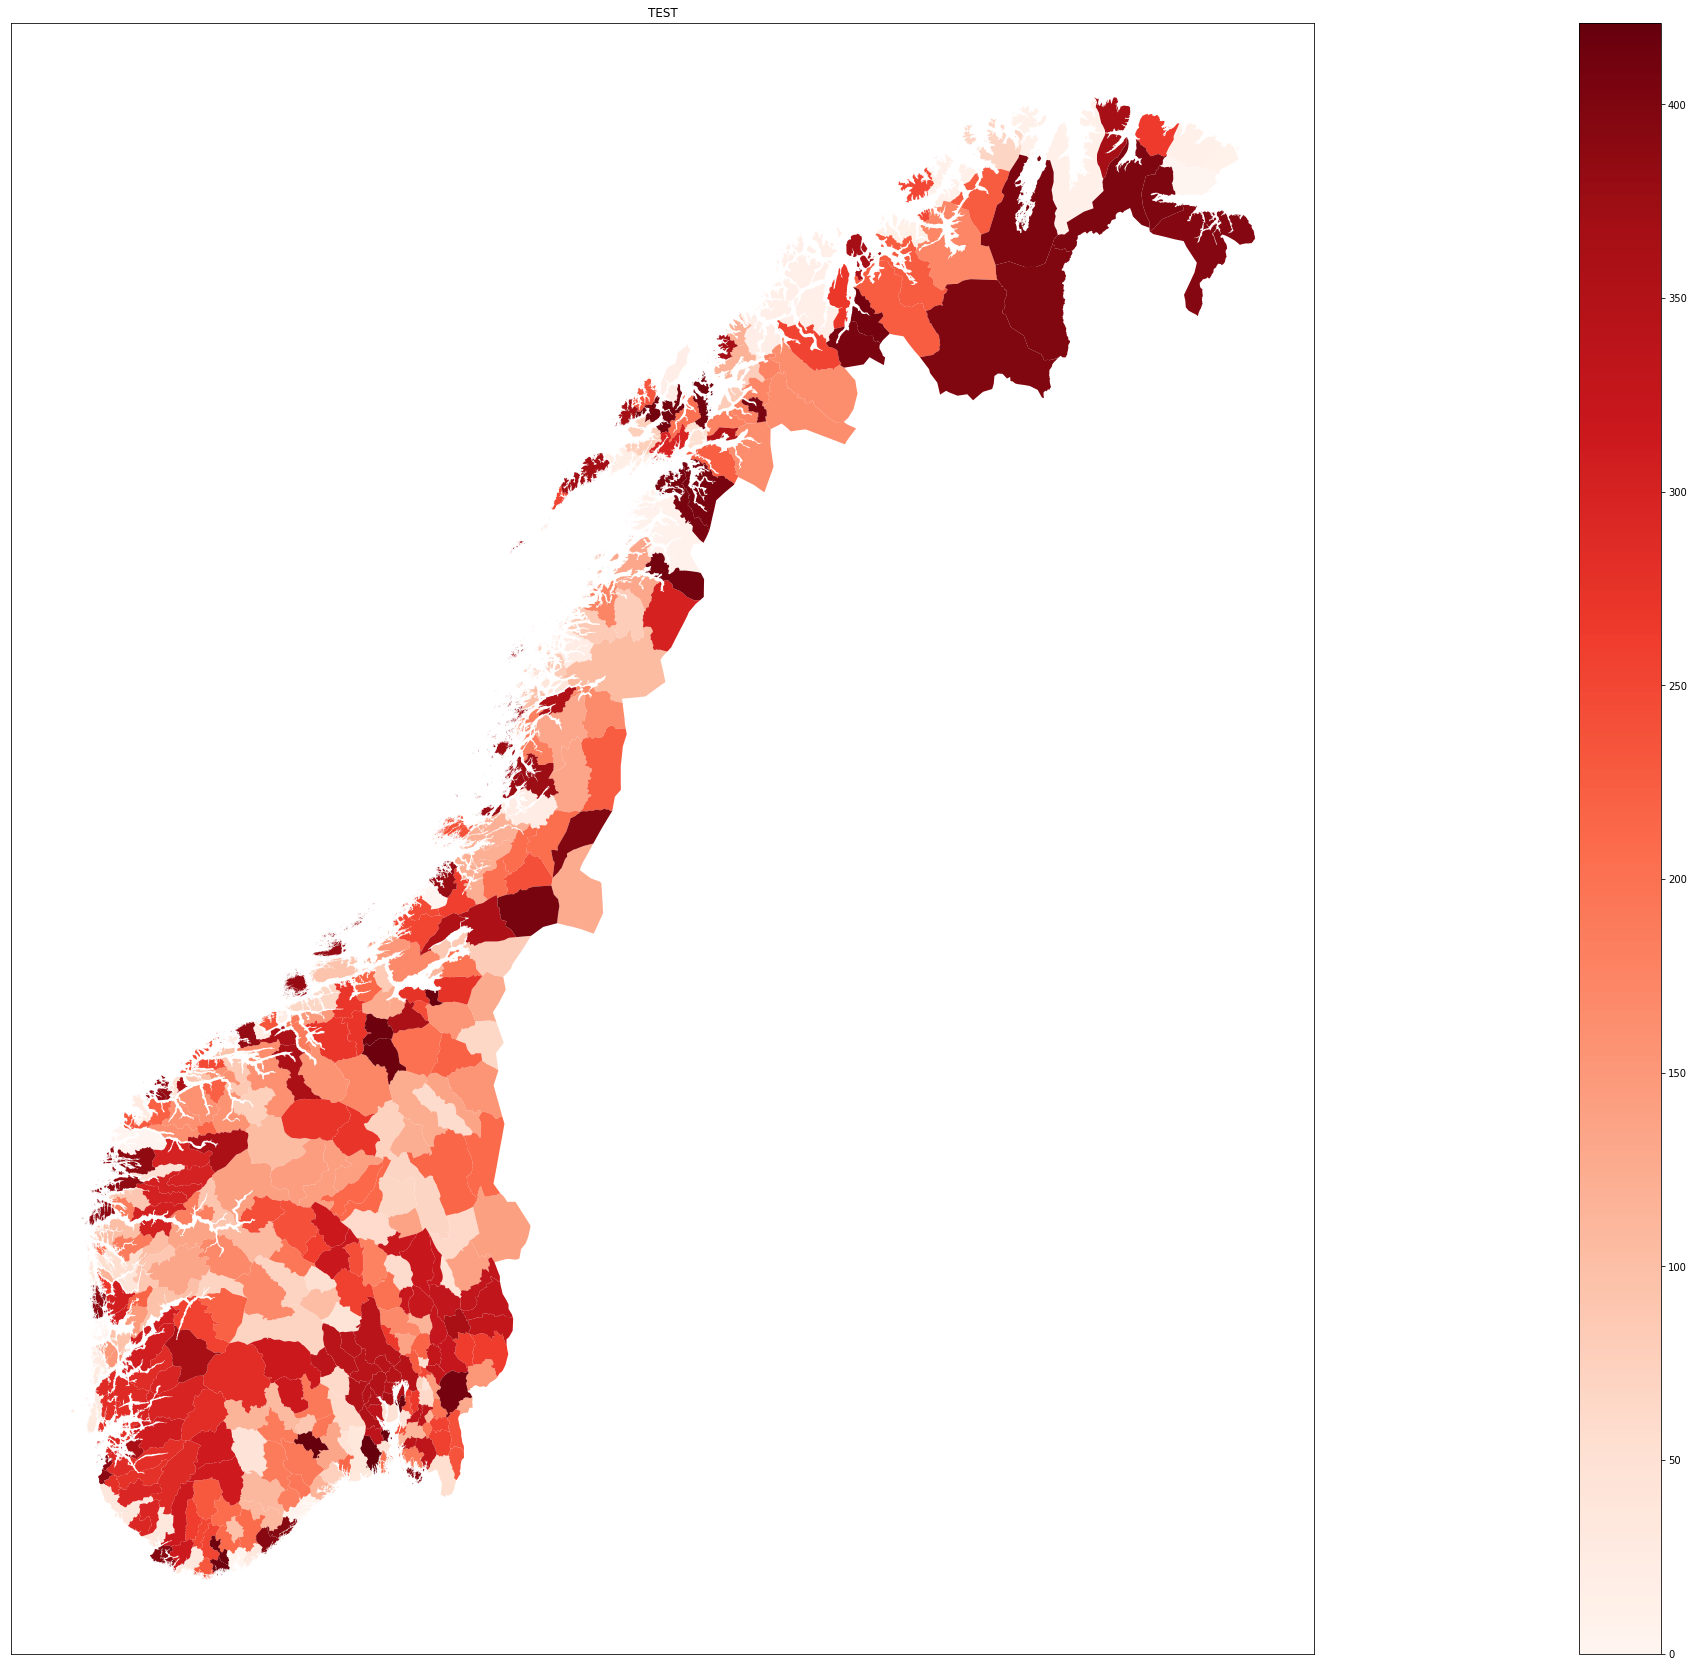

In [22]:
visualize(df_municipalities, np.array([i for i in range(len(df_municipalities))]), 'TEST')

In [8]:
print(list(df_municipalities.iloc[:,1])) # Municipalities!

['Vadsø', 'Osen', 'Bremanger', 'Austevoll', 'Kristiansand', 'Tvedestrand', 'Risør', 'Steigen', 'Sørfold', 'Vardø', 'Båtsfjord', 'Lebesby', 'Nordkapp', 'Hammerfest', 'Loppa', 'Karlsøy', 'Tromsø', 'Lenvik', 'Andøy', 'Vågan', 'Værøy', 'Rødøy', 'Bindal', 'Kristiansund', 'Eide', 'Aukra', 'Selje', 'Fedje', 'Bømlo', 'Haugesund', 'Karmøy', 'Utsira', 'Hå', 'Eigersund', 'Flekkefjord', 'Lindesnes', 'Lillesand', 'Larvik', 'Nesna', 'Øygarden', 'Osterøy', 'Rælingen', 'Løten', 'Fyresdal', 'Vestby', 'Flå', 'Svelvik', 'Siljan', 'Tønsberg', 'Hurum', 'Naustdal', 'Ulstein', 'Tjeldsund', 'Gol', 'Gjerdrum', 'Halden', 'Radøy', 'Lindås', 'Tolga', 'Gjøvik', 'Gausdal', 'Kongsberg', 'Flesberg', 'Åmot', 'Enebakk', 'Tydal', 'Aure', 'Ringebu', 'Stor-Elvdal', 'Måsøy', 'Ål', 'Nore og Uvdal', 'Ulvik', 'Lørenskog', 'Folldal', 'Bamble', 'Hadsel', 'Norddal', 'Dyrøy', 'Ibestad', 'Beiarn', 'Lurøy', 'Verdal', 'Agdenes', 'Vestnes', 'Meløy', 'Inderøy', 'Stordal', 'Vaksdal', 'Fjaler', 'Bø', 'Sogndal', 'Sula', 'Hitra', 'Midsund

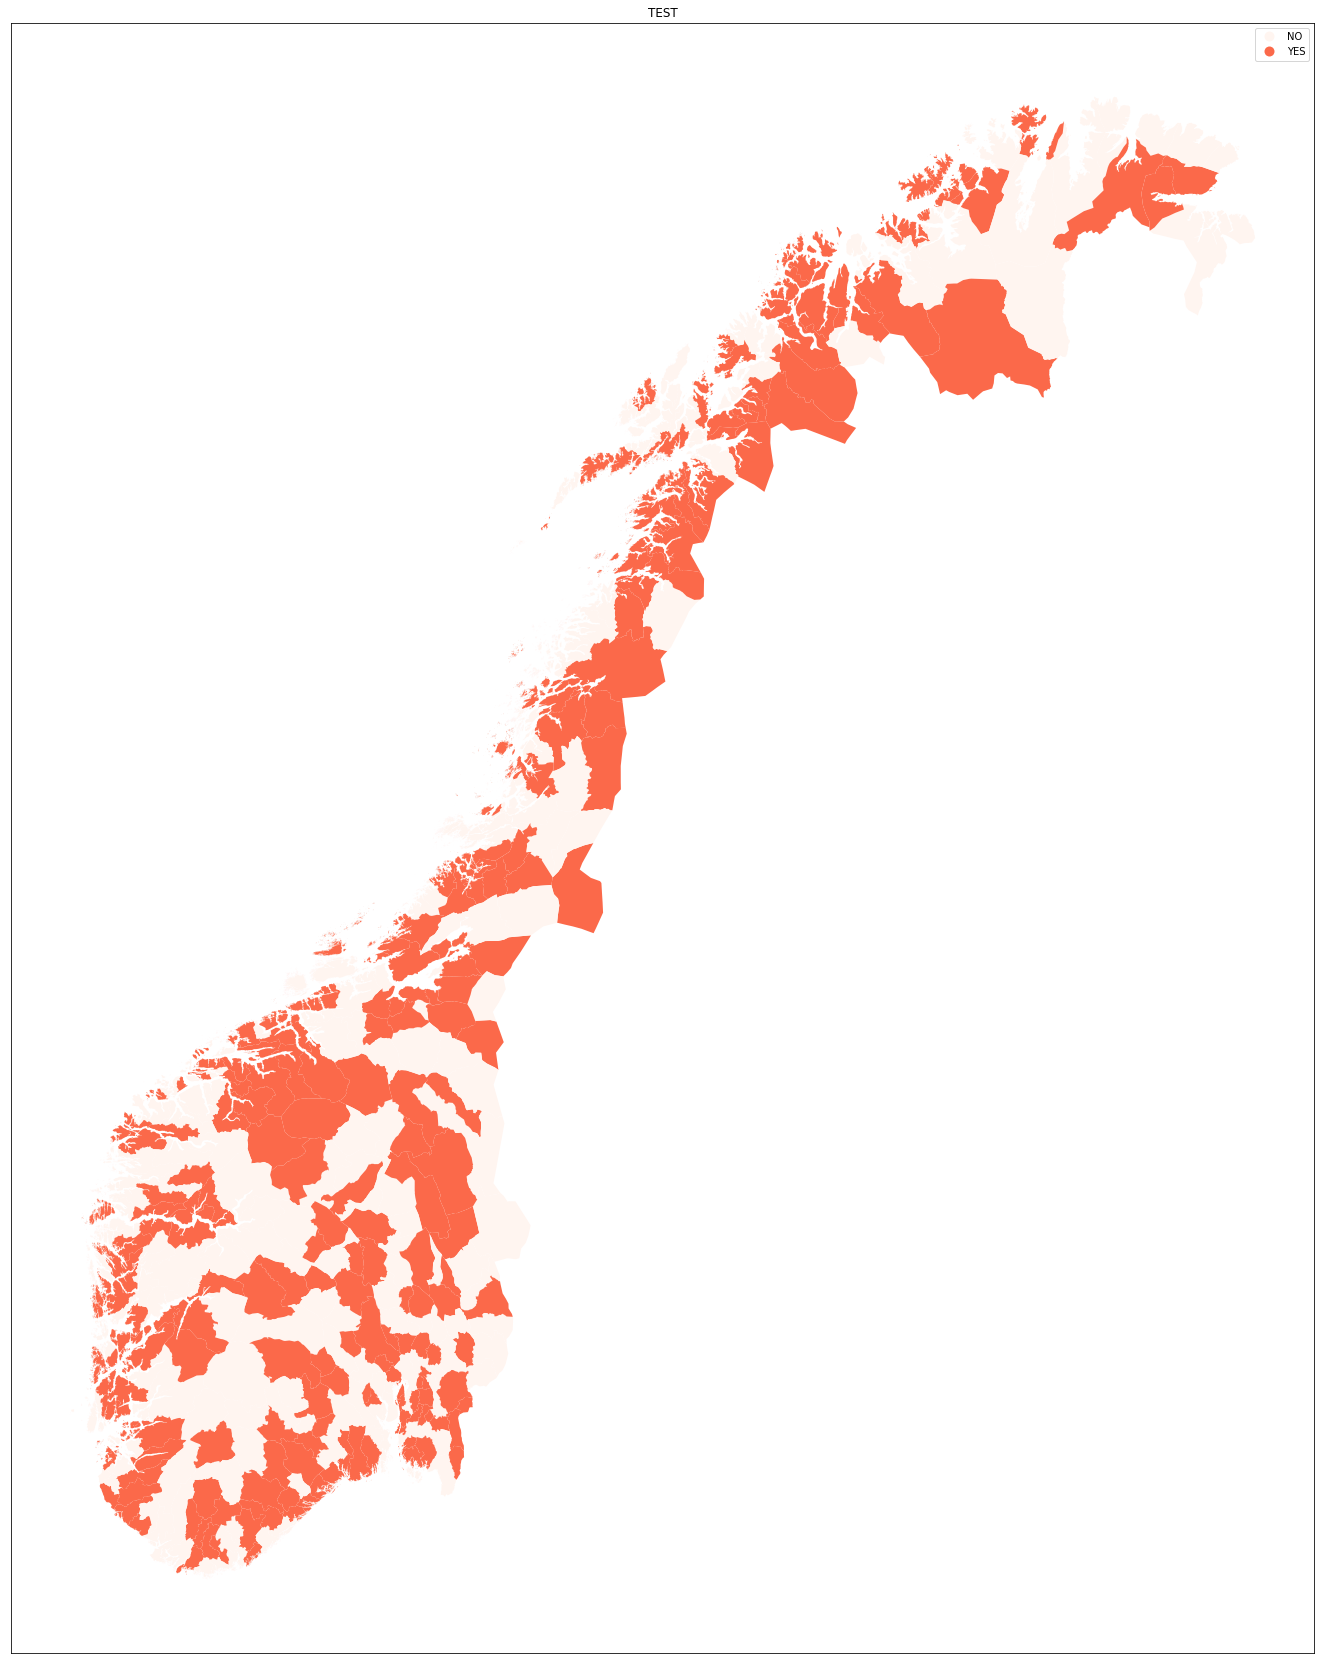

In [25]:
visualize(df_municipalities, np.array([np.random.permutation(['YES', 'NO'])[0] for _ in range(len(df_municipalities))]), 'TEST', True)